In [1]:
print("GET ON WiTH FUNKOT")
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
import mglearn

GET ON WiTH FUNKOT


w[0]: 0.393906  b: -0.031804


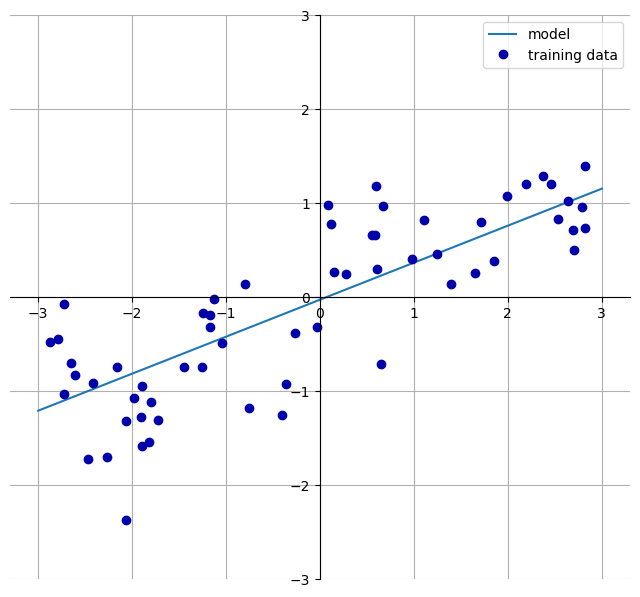

In [2]:
mglearn.plots.plot_linear_regression_wave()


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [4]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("LR.coef_: {}".format(LR.coef_))
print("LR.intercepr_: {}".format(LR.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
LR.coef_: [0.39390555]
LR.intercepr_: -0.031804343026759746


In [5]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


In [6]:
#试试更高维的数据集
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
lr = LinearRegression().fit(X_train,y_train)

In [7]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


In [8]:
#岭回归，L2正则化，惩罚L2范数或w的欧式长度
#w：权重，b：截距
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


In [9]:
#调整岭回归的alpha参数
ridge10 = Ridge(alpha = 10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


In [10]:
ridge01 = Ridge(alpha = 0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))


Training set score: 0.93
Test set score: 0.77


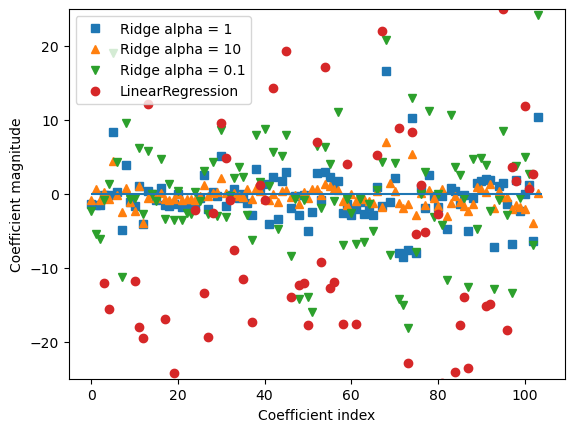

In [11]:
plt.plot(ridge.coef_,'s',label = "Ridge alpha = 1")
plt.plot(ridge10.coef_,'^',label = "Ridge alpha = 10")
plt.plot(ridge01.coef_,'v',label = "Ridge alpha = 0.1")

plt.plot(lr.coef_,'o',label = "LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

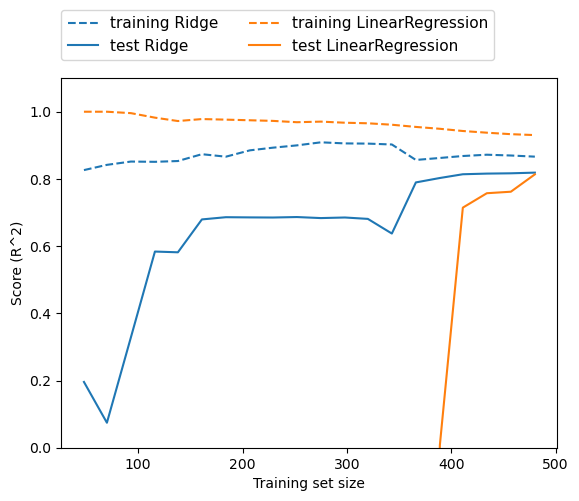

In [12]:
mglearn.plots.plot_ridge_n_samples()

In [13]:
#lasso
#惩罚系数向量的L1范数，L1正则化
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [14]:
#减少lasso的alpha，增加max_iter
lasso001 = Lasso(alpha = 0.01,max_iter = 100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [15]:
#lasso的alpha过少
lasso00001 = Lasso(alpha = 0.0001,max_iter = 100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

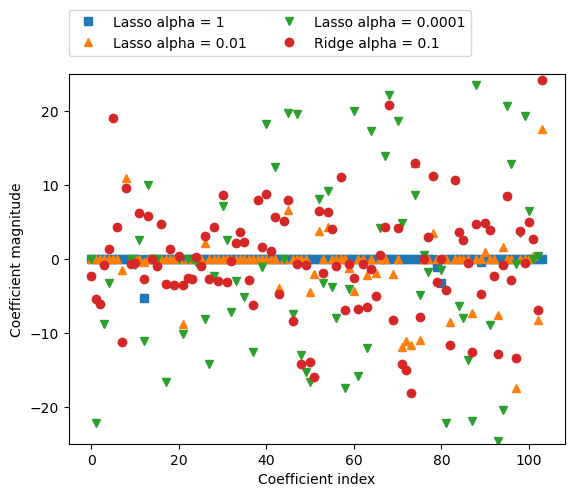

In [16]:
plt.plot(lasso.coef_,'s',label = "Lasso alpha = 1")
plt.plot(lasso001.coef_,'^',label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_,'v',label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_,'o',label = "Ridge alpha = 0.1")
plt.legend(ncol = 2,loc = (0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")


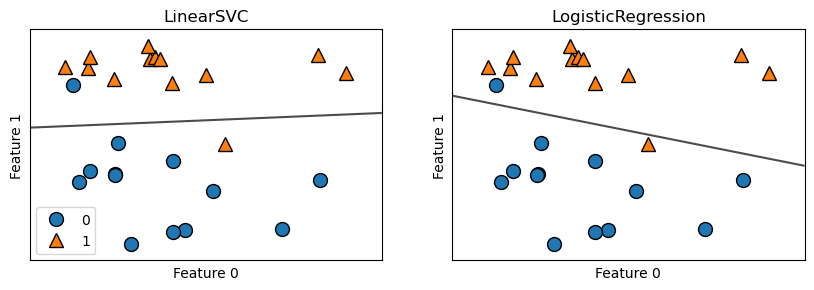

In [17]:
#用于分类的线性模型
#Logistic回归和线性支持向量机
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X,y = mglearn.datasets.make_forge()
fig,axes = plt.subplots(1,2,figsize = (10,3))
for model,ax in zip([LinearSVC(max_iter=10000),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill = False,eps = 0.5,ax = ax,alpha = .7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()


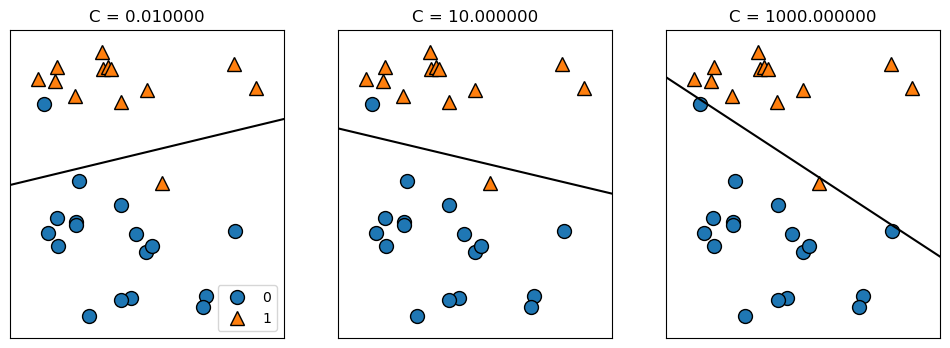

In [18]:
#不同C值的SVM
mglearn.plots.plot_linear_svc_regularization()

In [19]:
#高维的Logistic回归
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 42)
#取不同的C值
# C = 1
logreg = LogisticRegression().fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.955
Test set score: 0.958


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Training set score: 0.958
Test set score: 0.958


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

Training set score: 0.934
Test set score: 0.930


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


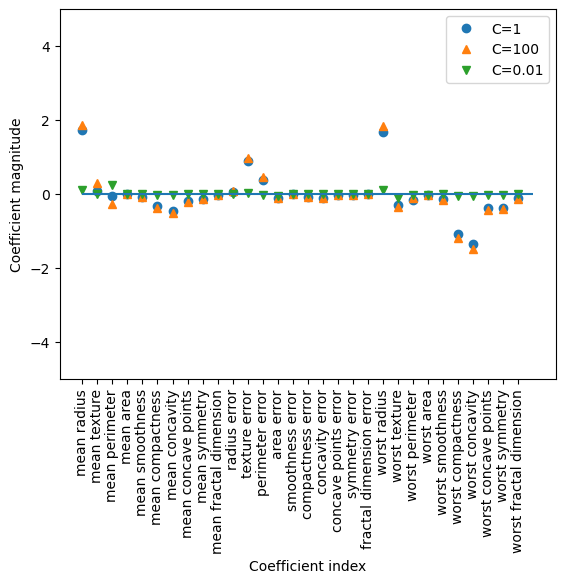

In [22]:
#三个Logistic回归均为L2正则化
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [23]:
#考虑L1正则化的Logisitc回归
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(penalty="l1",C=C,solver="liblinear").fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuract of l1 logreg with C={:.3f}: {:.2f}".format(C,lr_l1.score(X_test,y_test)))

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuract of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuract of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuract of l1 logreg with C=100.000: 0.98


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


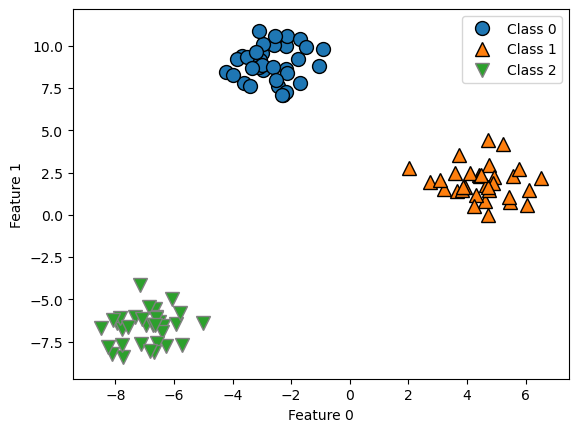

In [26]:
#用于多分类的线性模型
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

In [27]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ",linear_svm.coef_.shape)
print("Intercept shape: ",linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


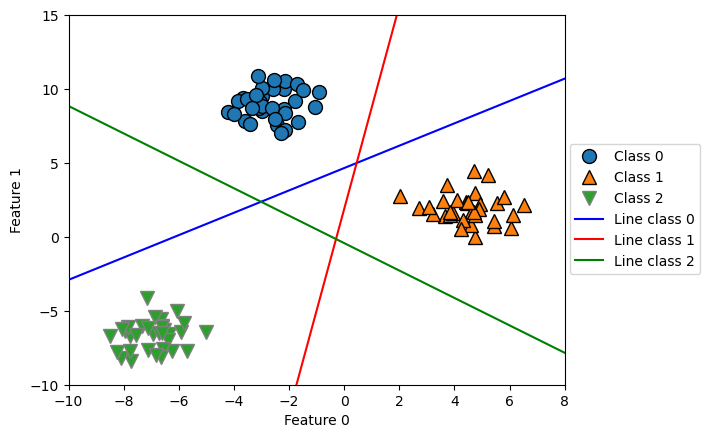

In [29]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0] + intercept) / coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

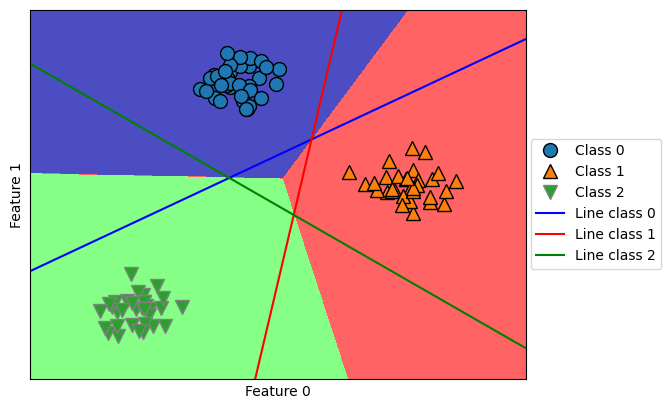

In [32]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line * coef[0] + intercept) / coef[1],c=color)
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc = (1.01,0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")